## Simulation des Action:
pour simuler une action il faut:
## Rapelles sur la fonction de répartition :
fX(x) = p(X<=x) , fonction de répartition de X
on rapelle </br>
lim x => -infini FX(x) = 0,
lim Fx en + infini = 1,
X-> Fx appartien a 0,1 </br>
## rapelle fonction de densité:
ON dit que X admet une densité , ou la Fonction de répartition est égale a </br>
Fx = intégrale de (- infini -> x) g(y) dy.
## inverse généralisé de la fonction de répartition F-1(x)
F-1(y) = inf {x : F(x)>=y } </br>
et on la définiti essentiellement sur  y qui appartient a ]0,1[ car : </br>
F-1(0) =  inf {x : F(x)>=0 } = inf \]-inf,+inf[ = -inf
### proposition :
si U est une loi uniforme sur [0,1] alors : F-1x(U) suit la meme loi que X.( Prouvé dans le cours Monte Carclo)
#### remarque :
U est une loi uniforme sur[a,b] signifie que densité de u g(x) = 1/b-a * indicatrice[a,b] </br>
si un est une loi uniforme sur 0,1 alors la probabilité que U soit 0 ou 1 est nulle.
## résultats:
pour simuler des variables aléatoire de loi X il suffit de simuler les valeurs d'une loi U uniforme sur (0,1) et alors d'obtenir F-1X(U),quand on connait Fx-1.
### Exemple d'un algorithme pour calculer la fréquance des F-1X
l'exemple est le suivant : 
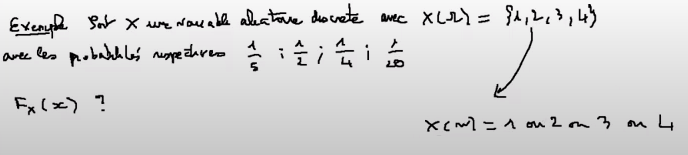
La solution est la suivante : 
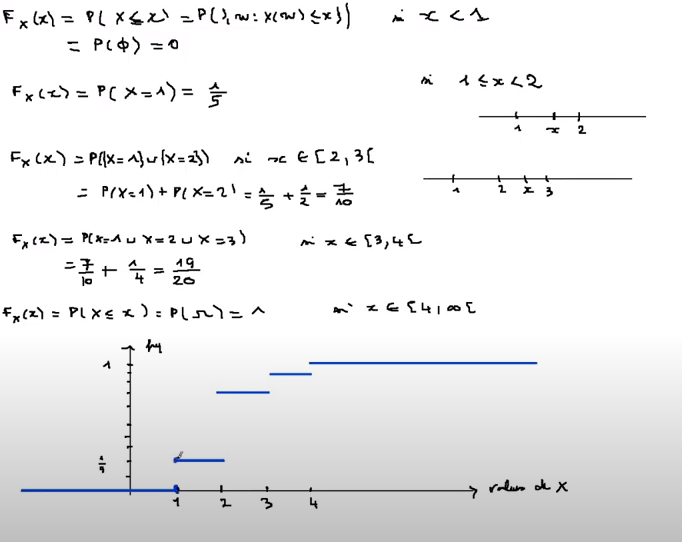
</BR></br>
Ici, nous avons implémenté le code qui calcule la fréquance de la répartition inverse par rapport a l'exemple précédent.

les valeurs généré de par la loi uniforme  :  [0.63042266 0.87763587 0.99591192 0.57065075 0.7563261  0.2568556
 0.32137035 0.44652638 0.87032343 0.79290167]
Les valeurs de la fonction de répartition inverse sont :  [2 3 4 2 3 2 2 2 3 3]


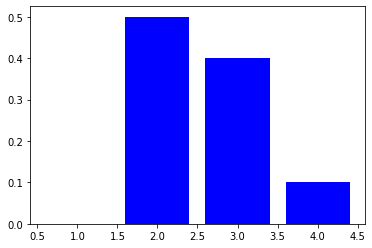

In [39]:
import numpy as np
import numpy.random as sim
import matplotlib.pyplot as plt

def F(u): #F=Fx-1
    y=1*(u<1/5)+2*(1/5<=u)*(u<7/10)+3*(7/10<=u)*(u<19/20)+4*(u>19/20)
    return y

N=10 #la taille de l'echantillon

U=sim.ranf((N,))#loi uniforme sur [0,1]
print("les valeurs généré de par la loi uniforme  : ", U)
X=F(U)
print("Les valeurs de la fonction de répartition inverse sont : ", X)

frq= np.arange(0,4,dtype=float)
for i in range(0,4):
    frq[i]=np.sum(1*(X==i+1))/N

larg=0.8 #lar rectangles
ax1=np.array([1,2,3,4])
hoistX=plt.bar(ax1,frq,larg,color='b')
plt.show()

### Exercice (partie 2) : 
Dans cette partie nous avons difinit une loi exepenetielle de parametre Lambda, comme suit  : 
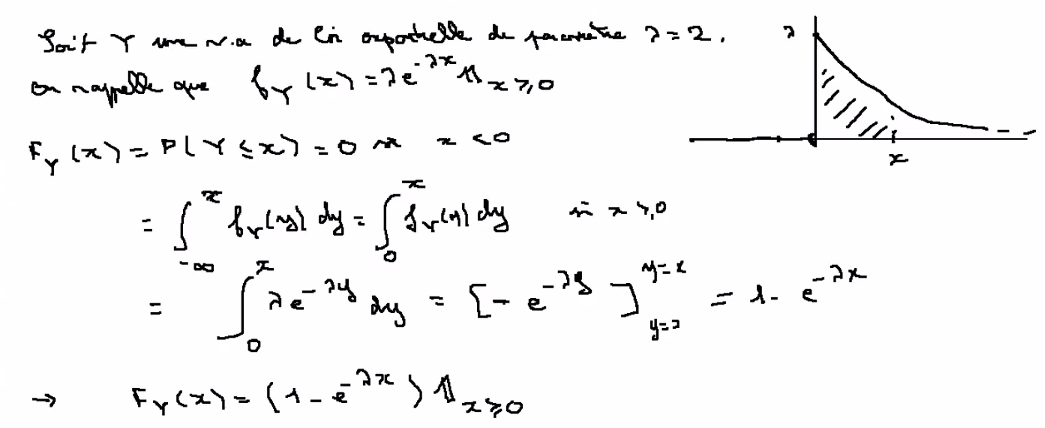 </br>
la fonction de répartition de cette loi Y est la suivante <br>
###### FY(x) = 1-exp(-lambda*x)*(indicatrice [0,+infini])

#### Calcul de la répartition inverse : 
pout calculer la fonction de répartition il faut trouver : 
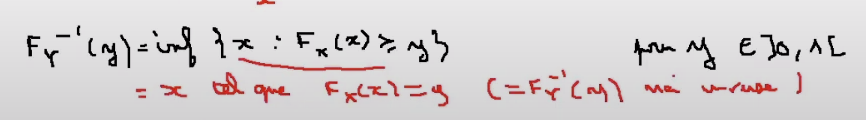
En résumé c'est x tel que FX(x)=y
Donc la valeur de la fonction de répartition inverse est : 
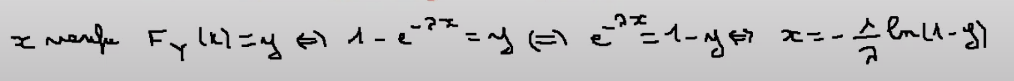
#### Déduction : 
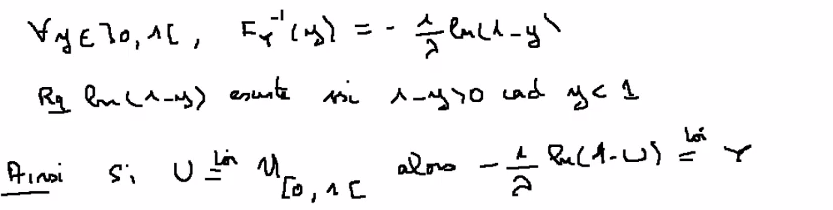
Ainsi que, Comme U et 1-U sont symétrique parraport à 1/2  donc 1-U et U sont de meme loi. 
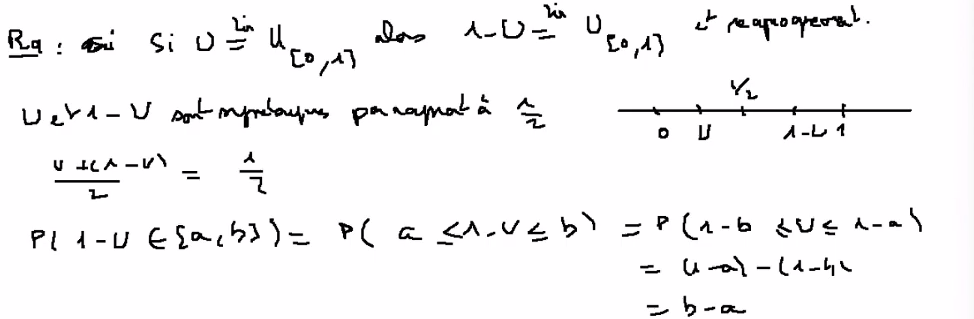
#### Exercice sur python : 
Simuler un echantillion de Y indépendant de C puis en déduire une estimation de EY(x)(esperence de loi Y par rapport a x), Avec lambda = 2</br>
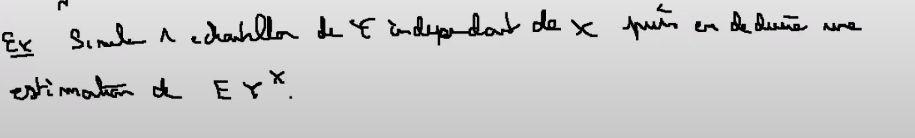
Attention : il faut utilisé des valeurs de loi uniforme differentes de la premiere loi X pour que Y et X soit indépendantes.

In [40]:
def G(u): 
    return -np.log(1-u)/2

N=100000 #la taille de l'echantillon

U=sim.ranf((N,))#loi uniforme sur [0,1]
X=F(U)
print("les valeurs généré de par la loi uniforme U : ", U)
print("Les valeurs de la fonction de répartition inverse de X sont : ", X)


# ici , nous avons utilisé des valeurs diffentes de U, Pour que X et Y soit indépandents. 
V = sim.ranf((N,))
Y = G(V)
print("les valeurs généré de par la loi uniforme V  : ", V)
print("Les valeurs de la fonction de répartition inverse de Y sont : ", Y)

Z = Y**X
esperence =np.mean(Z)
print("le resultat de l'eseprence est de : ", esperence)

les valeurs généré de par la loi uniforme U :  [0.84052036 0.77767839 0.38230827 ... 0.43249418 0.21167194 0.55060987]
Les valeurs de la fonction de répartition inverse de X sont :  [3 3 2 ... 2 2 2]
les valeurs généré de par la loi uniforme V  :  [0.06828783 0.27052493 0.89515861 ... 0.97862924 0.98450835 0.2321593 ]
Les valeurs de la fonction de répartition inverse de Y sont :  [0.03536567 0.15771504 1.1276533  ... 1.92286585 2.08372695 0.1320865 ]
le resultat de l'eseprence est de :  0.611379900342957


#### remarque : 
selon la loi des grands nombre, la moyenne de la variable aléatoire pour un N assez grand converge vers l'esperence de Y^X. 
et donc, en augmantant le N, on remarque que l'eperence converge vers la meme valeur. 
## Simulation d'un mouvement Brownein : 
### definition : 
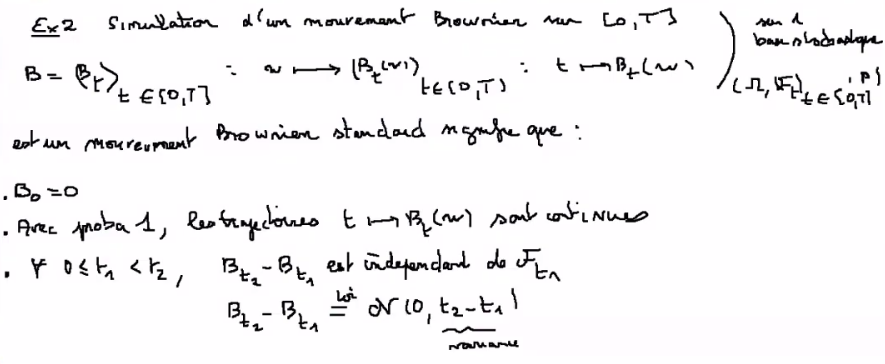
### simulation : 
Pour simuler ce mouvement il suffit de descritisé le temps, càd, le diviser en plusieurs partie. ces parties s'appelles "Le pas"
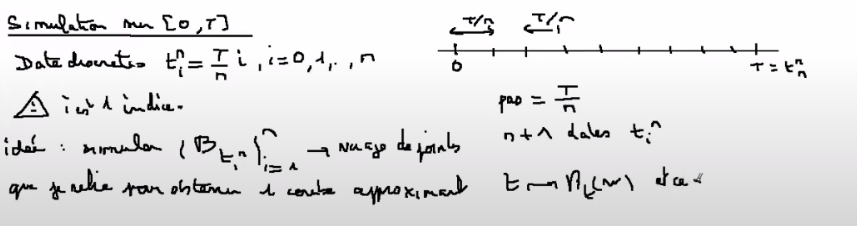
Suivant ces donnée la simulation du mouvement brownien se fait avec la formule d'Euler qui permet d'obtenir un mouvement brownien continue sur [0,T] 
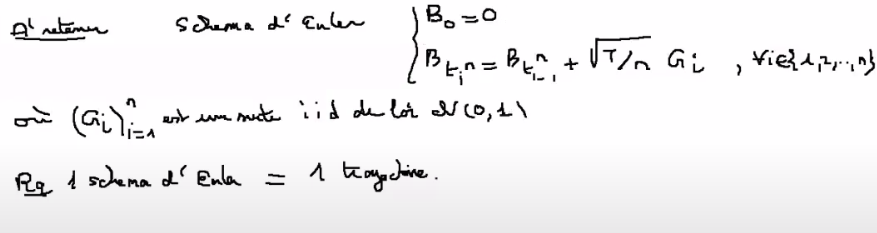
La preuve est facile et elle est la suivante : 
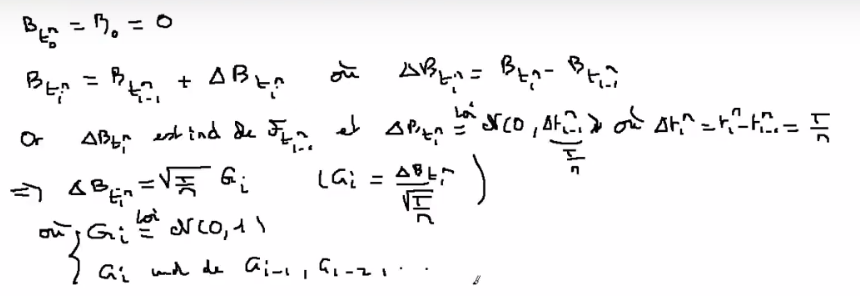
#### ici on simule qu'une seule trajectoire 
plusieurs trajectoires peuvent etre simulé. La méthode suivante permet de simuler un mouvement brownien en passant le nombre de trajectoire qu'on veut simuler en parametre

simulation d'une seule trajectoire


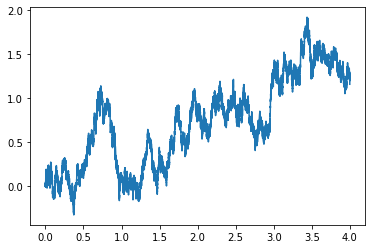

simulation de 10 trajectoires


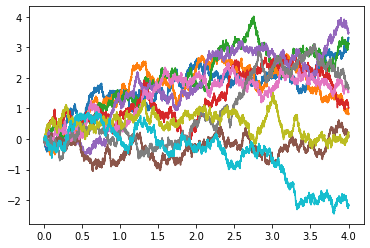

In [41]:
def simulationMouvementBrownien(T,n,nbTrajectoires):
    
    N=nbTrajectoires # nombre de trajectoirs
    pas =T/n

    B=np.zeros((n+1,N))
    #Bt0=0 déja initialisé avec la matrice B.zero
    for j in range(N):
        for i in range(1,n+1):
            B[i,j]=B[i-1,j]+np.sqrt(pas)*sim.randn()

    dates=np.linspace(0,T,n+1) # n+1 dates
    graph=plt.plot(dates,B)
    plt.show()

print("simulation d'une seule trajectoire")
simulationMouvementBrownien(T=4,n=100000,nbTrajectoires=1)

print("simulation de 10 trajectoires")
simulationMouvementBrownien(T=4,n=100000,nbTrajectoires=10)

 ## Simulations du modèl black and scholes : 
 
la simulation du modèl black and scholes est plus facile une fois qu'on a simulé le mouvement brownien. 

En fixant les parametres sigma, mu , et N ... ,le model de black and shcoles est une fonction f(t,b(t)) ou ici le b(t) est le mouvement brownien. 
il faut dire ici que le temps est descritisé, donc le t = t(i,n) a l'instant i ou plus précisément, 
t(i,n) = pas * i , ou ici pas = T/N. Comme c'est expliqué dans la partie simulation du mouvement brownien. 

La formule et la simulation est détaillé ci-dessous : </br>

![Course](images/img1.png)

</br> </br> le code suivant définit la méthode de simulation du modél black and scholes. 


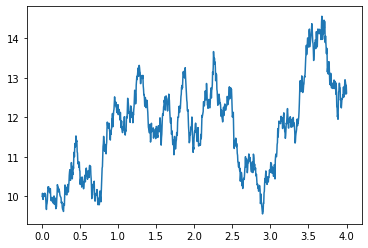

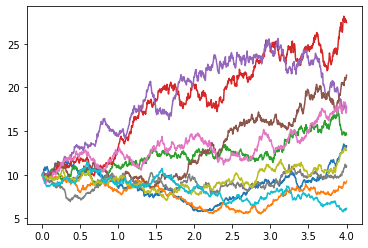

In [42]:

def simulationBlackAndScholes(S0,T,nbTrajectoires,n_coeffDeDiscritisation,sig,mu):
    n=n_coeffDeDiscritisation;N=nbTrajectoires
    pas =T/n
    B=np.zeros((n+1,N))
    #Bt0=0 déja initialisé avec la matrice B.zero
    S = np.ones((n+1,N))*S0
    def f(t,x): 
        return S0 * np.exp(sig*x + (mu-0.5*sig**2) * t)        
    for j in range(N):
        for i in range(1,n+1):
            B[i,j]=B[i-1,j]+np.sqrt(pas)*sim.randn()
            S[i,j] = f(pas*i,B[i,j])
    dates=np.linspace(0,T,n+1) # n+1 dates
    graph=plt.plot(dates,S)
    plt.show()
    
simulationBlackAndScholes(S0=10,T=4,nbTrajectoires = 1,n_coeffDeDiscritisation= 1000,sig=0.2,mu=0.08)
simulationBlackAndScholes(S0=10,T=4,nbTrajectoires = 10,n_coeffDeDiscritisation= 1000,sig=0.2,mu=0.08)

### Calcul de la valeur de l'erreure relative dans le modél black and Scholes
la valeur de l'erreure relative représenté a quelle point notre résultat est fiable elle est calculé avec la formule suivante  : 
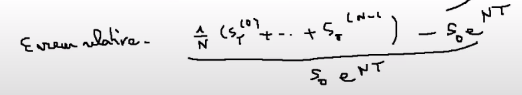, 
En effet, c'est la moyenne de la dérnière ligne de la matrice S[i,J], en augmentant le nombre de trajectoire on réduit la valeure de l'erreur relative.

La valeure de l'erreur relative est :  0.18525504043271754


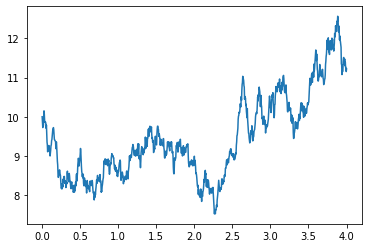

La valeure de l'erreur relative est :  0.09448719479525879


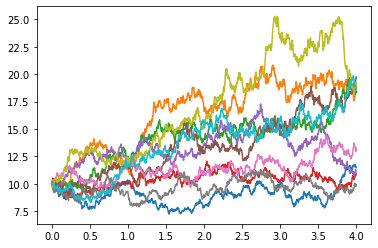

La valeure de l'erreur relative est :  0.0618678223203503


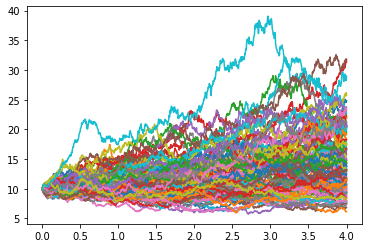

In [43]:
def simulationBlackAndScholesWithRelativeErrorValue(S0,T,nbTrajectoires,n_coeffDeDiscritisation,sig,mu):
    n=n_coeffDeDiscritisation;N=nbTrajectoires
    pas =T/n
    B=np.zeros((n+1,N))
    #Bt0=0 déja initialisé avec la matrice B.zero
    S = np.ones((n+1,N))*S0
    def f(t,x): 
        return S0 * np.exp(sig*x + (mu-0.5*sig**2) * t)        
    for j in range(N):
        for i in range(1,n+1):
            B[i,j]=B[i-1,j]+np.sqrt(pas)*sim.randn()
            S[i,j] = f(pas*i,B[i,j])
    
    moyenne = np.mean(S[n,:])
    esperence = S0 * np.exp(mu*T)
    relativeError = np.abs((moyenne - esperence)/esperence)
    print("La valeure de l'erreur relative est : ", relativeError)
    
    dates=np.linspace(0,T,n+1) # n+1 dates
    graph=plt.plot(dates,S)
    plt.show()

simulationBlackAndScholesWithRelativeErrorValue(S0=10,T=4,nbTrajectoires = 1,n_coeffDeDiscritisation= 1000,sig=0.2,mu=0.08)    
simulationBlackAndScholesWithRelativeErrorValue(S0=10,T=4,nbTrajectoires = 10,n_coeffDeDiscritisation= 1000,sig=0.2,mu=0.08)
simulationBlackAndScholesWithRelativeErrorValue(S0=10,T=4,nbTrajectoires = 100,n_coeffDeDiscritisation= 1000,sig=0.2,mu=0.08)

## Simulation des modèls avec volatilité local
ici on s'intéresse au shcéma de monte carlo. 
### Shema de discritisation d'EDS a volatilité local 
Soit l'EDS : 
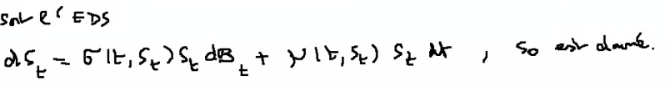
On suppose qye les coeefficient sigma et mu sont lipchtizien, çàd, qu'il existe une constante L > 0 telle que: 
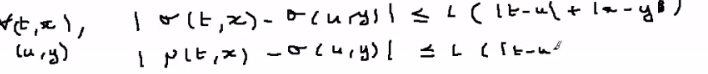
sous ces condition l'EDS, admet une solution. De plus on suppose qu'il existe un m_sigma > 0 , tel que 
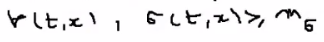
alors , t>=0, S(t) >0 . 
#### Remarque : 
la propiété de lipchtiz est garantie dès que sigma et mu sont dérivable à derivée bornées. 
#### théorème des differences finis : 
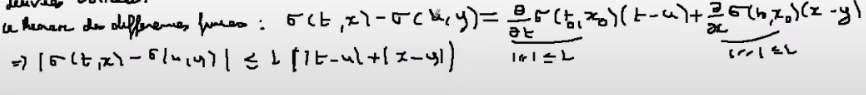
Les modeles a volatilités locales qu'on va considerer verifient ces conditions.
#### Formule de l'EDS : 
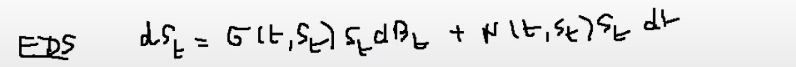
#### Exemple de résolution d'un EDS : 
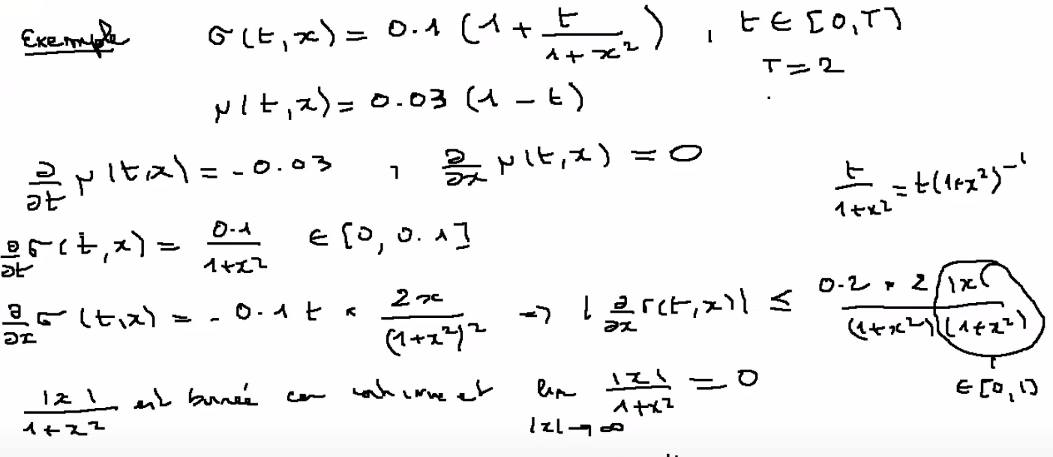
#### Shéma d'Euler  : 
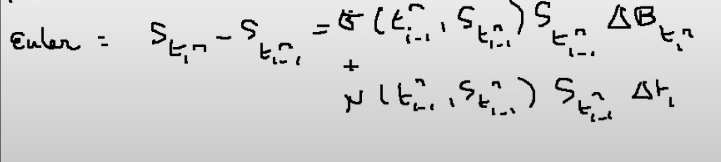
et donc : 
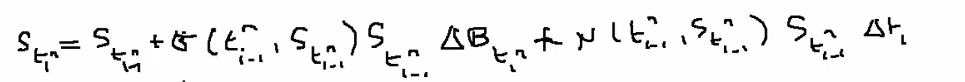

#### Remarque : 
Sous les conditions sur sigma et mu , on peut démentrer que la solution S= S(n)  du shéma d'Euler, Verifier : 
E sup(i) (St(i) - St(i,n))2  , converge vers 0 </br> 
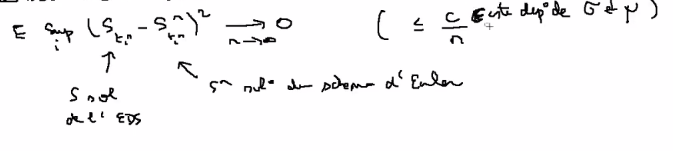
#### Rappel : 
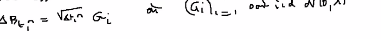
#### Etapes : 
Sur pythond donc on doit Simuler G(i) dans le shéma d'euler
</br> definir les fonction sigma et mu 
</br> stocker la trajectoire de S d'un une matrice. 
#### Application de l'exemple précedent : 
def modelAvolatiliteLocal():
    

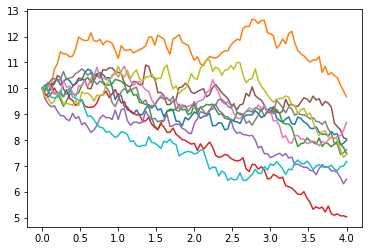

In [66]:
def fonction_sigma(t,x):
    return 0.1* (1+t/(1+x**2))
def fonction_mu(t,x):
    return 0.03 * (1-t)

n=100;N=10;T=4;S0=10
pas =T/n
B=np.zeros((n+1,N))

#Bt0=0 déja initialisé avec la matrice B.zero

S = np.ones((n+1,N))*S0


for j in range(N):
    for i in range(1,n+1):
        deltaBt = np.sqrt(pas)*sim.randn()
        S[i,j] = S[i-1,j] + fonction_sigma(pas*(i-1),S[i-1,j]) *S[i-1,j] * deltaBt +fonction_mu(pas*(i-1),S[i-1,j]) *S[i-1,j] * pas



dates=np.linspace(0,T,n+1) # n+1 dates
graph=plt.plot(dates,S)
plt.show()